# Reconstruction of band using Markov Random Field Model

## Model setup

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

from fuller.mrfRec import MrfRec
from fuller.utils import loadHDF

import os

2025-04-07 13:12:45.753156: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 13:12:45.771150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744024365.788315 3835679 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744024365.793286 3835679 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 13:12:45.811382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
data_path = '../' # Put in Path to a storage of at least 20 Gbyte free space.
if not os.path.exists(data_path + "/data.zip"):
    os.system(f"curl -L --output {data_path}/data.zip https://zenodo.org/records/7314278/files/data.zip")
if not os.path.isdir(data_path + "/data"):
    os.system(f"unzip -d {data_path} -o {data_path}/data")

In [3]:
# Load preprocessed data
data = loadHDF('../data/pes/1_sym.h5')
E = data['E']
kx = data['kx']
ky = data['ky']
I = data['V']

In [4]:
# Create MRF model
mrf = MrfRec(E=E, kx=kx, ky=ky, I=I, eta=.12)
mrf.I_normalized = True

## Initialization

In [5]:
# Initialize mrf model with band structure approximation from DFT
path_dft = '../data/theory/WSe2_PBEsol_bands.mat'

band_index = 4
offset = .5
k_scale = 1.1

kx_dft, ky_dft, E_dft = mrf.loadBandsMat(path_dft)
mrf.initializeBand(kx=kx_dft, ky=ky_dft, Eb=E_dft[band_index,...], offset=offset, kScale=k_scale, flipKAxes=True)

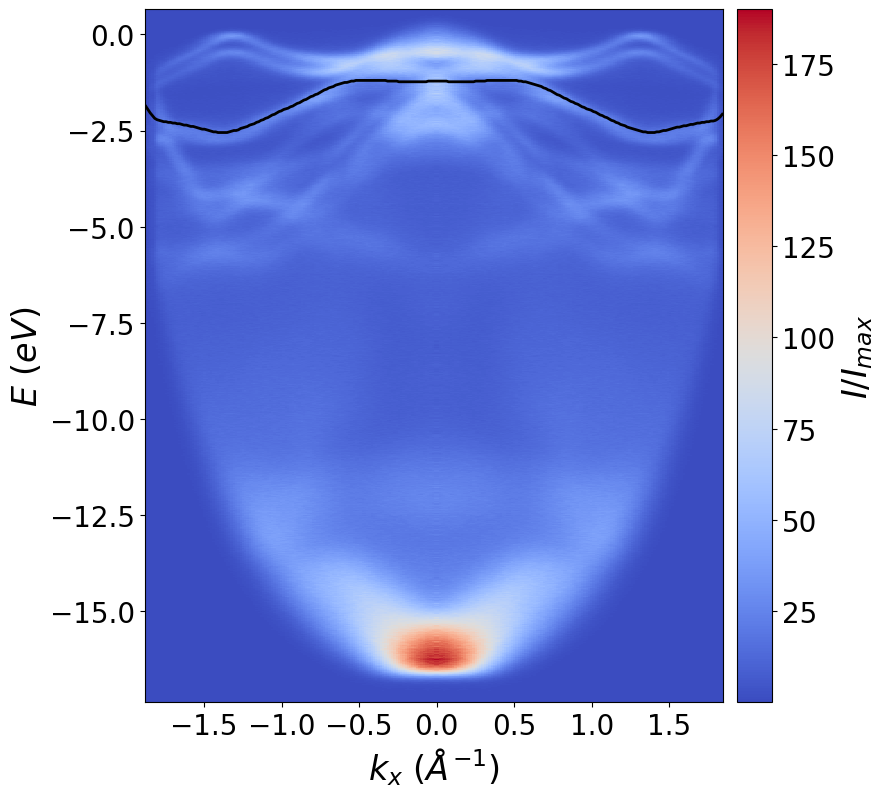

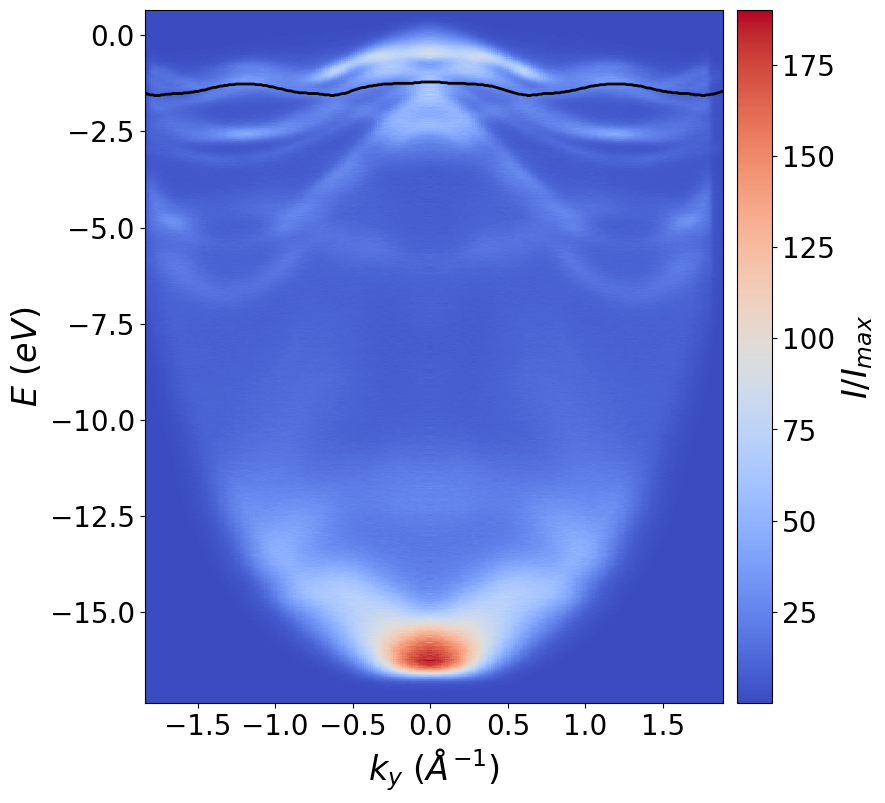

In [6]:
# Plot slices with initialiation to check offset and scale
mrf.plotI(ky=0, plotBandInit=True, cmapName='coolwarm')
mrf.plotI(kx=0, plotBandInit=True, cmapName='coolwarm')

## Reconstruction

In [7]:
# Run optimization to perform reconstruction
eta = .1
n_epochs = 150

mrf.eta = eta
mrf.iter_para(n_epochs)

I0000 00:00:1744024372.975871 3835679 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 890 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:06:00.0, compute capability: 8.0
2025-04-07 13:13:03.624705: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 128.00MiB (rounded to 134217728)requested by op Square
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-04-07 13:13:03.624795: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for GPU_0_bfc
2025-04-07 13:13:03.624820: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-04-07 13:13:03.62

ResourceExhaustedError: {{function_node __wrapped__Square_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Square] name: 

In [ ]:
# Plot results
mrf.plotBands()
mrf.plotI(ky=0, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')
mrf.plotI(ky=0.5, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')
mrf.plotI(kx=0, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')
mrf.plotI(kx=0.5, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')

In [ ]:
# Save results
path_save = 'reconstructed_bands'
mrf.saveBand(path_save + 'mrf_rec_%02i.h5' % band_index, index=band_index)